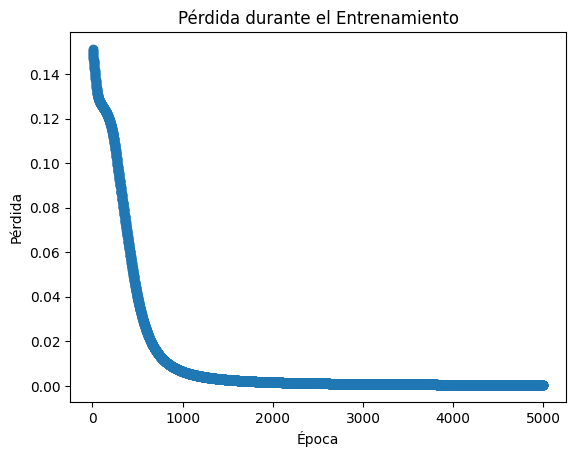

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Función de activación ReLU
def relu(x):
    return np.maximum(0, x)

# Derivada de la función de activación ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función de activación sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Conjunto de datos para resaltar la pérdida
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# X = np.array([[3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10]])
# y = np.array([[3], [6], [9], [12], [15], [18], [21], [24], [27], [30]])

# Inicialización de pesos y sesgos
np.random.seed(42)
input_layer_size = 2
hidden_layer_size = 4
output_layer_size = 1

weights_input_hidden = np.random.uniform(size=(input_layer_size, hidden_layer_size))
bias_hidden = np.zeros((1, hidden_layer_size))
weights_hidden_output = np.random.uniform(size=(hidden_layer_size, output_layer_size))
bias_output = np.zeros((1, output_layer_size))

# Hiperparámetros
learning_rate = 0.1
epochs = 5000

# Entrenamiento utilizando backpropagation
losses = []

for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    
    # Calcular la pérdida
    loss = np.mean(0.5 * (y - output_layer_output) ** 2)
    losses.append(loss)
    
    # Backpropagation
    output_layer_error = y - output_layer_output
    output_layer_delta = output_layer_error * sigmoid_derivative(output_layer_output)
    hidden_layer_error = output_layer_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * relu_derivative(hidden_layer_output)
    
    # Actualizar pesos y sesgos
    weights_hidden_output += learning_rate * hidden_layer_output.T.dot(output_layer_delta)
    bias_output += learning_rate * np.sum(output_layer_delta, axis=0, keepdims=True)
    weights_input_hidden += learning_rate * X.T.dot(hidden_layer_delta)
    bias_hidden += learning_rate * np.sum(hidden_layer_delta, axis=0)
    
# Visualización de la pérdida durante el entrenamiento
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.show()


In [31]:
from sklearn.metrics import accuracy_score

# Conjunto de datos de prueba
X_test = np.array([[3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10]])
y_test = np.array([[0]])

# X_test = np.array([[1, 0]])
# y_test = np.array([[0]])

# Función de predicción
def predict(X):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = sigmoid(output_layer_input)
    return np.argmax(output_layer_output, axis=1)

# Realizar predicciones en el conjunto de prueba
y_pred = predict(X_test)
print(y_pred)
# Calcular la precisión en el conjunto de prueba
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Precisión en el conjunto de prueba: {accuracy:.2f}')


[0 0 0 0 0 0 0 0 0 0]
